In [1]:
import numpy as np
import subprocess
import os

DELETE_TEMP = True

temp_inp = '''
echo
START h2o
TITLE "B3LYP/6-31G* H2O O1s Excitation"

permanent_dir ./perm
scratch_dir ./scratch

GEOMETRY
 O     0.00000000     0.00000000     0.12982363
 H     0.75933475     0.00000000    -0.46621158
 H    -0.75933475     0.00000000    -0.46621158
END

BASIS
 * library 6-31G*
END

DFT
 XC B3LYP
END

TDDFT
 CIS
 NOTRIPLET
 NROOTS 20
 ECUT -19.0
END

TASK TDDFT ENERGY
'''

NWCHEM_EXEC = "/home/yzhang/Work/NWChem/nwchem/bin/LINUX64/nwchem"
INP = "nwchem_inp.tmp"
OUT = "nwchem_out.tmp"

with open(INP,"w") as f:
    f.writelines(temp_inp)

with open(OUT,"w") as f_o:
    subprocess.run([NWCHEM_EXEC, INP], stdout=f_o) # check whether NWChem run properly or not

ex_e = []
osc_str = []

with open(OUT, 'r') as NWChemOut:
    for line in NWChemOut:
        if line.startswith("  Root"):
            ex_e.append(float(line.split()[6]))
            NWChemOut.readline()
            NWChemOut.readline()
            NWChemOut.readline()
            NWChemOut.readline()
            NWChemOut.readline()
            NWChemOut.readline()
            NWChemOut.readline()
            line1 = NWChemOut.readline()
            osc_str.append(float(line1.split()[3]))
            
for i in range(len(ex_e)):
    print(ex_e[i],osc_str[i])

if DELETE_TEMP:
    os.remove(INP)
    os.remove(OUT)

520.4097 0.0131808285
522.2438 0.028752187
538.9976 0.0038669543
540.7229 0.05817591
541.3082 0.0666762557
542.3843 0.00686809
546.2478 0.0632762823
550.3214 0.0067121424
563.6724 2.3812e-06
564.1202 2.4081e-06
565.0425 8.7711e-06
579.0744 3.8919e-05
587.1021 4.1251e-06
613.9675 0.2332582353


In [5]:
# write the data file

datafile = "simu_data.dat"

cutoff_erange = 25.0 # discard the unphysical high energy excitations

with open(datafile,"w") as DATA:
    for i in range(len(ex_e)):
        if (ex_e[i] - ex_e[0]) <= cutoff_erange:
            DATA.write('%-20f %-20f\n' %(ex_e[i],osc_str[i]))

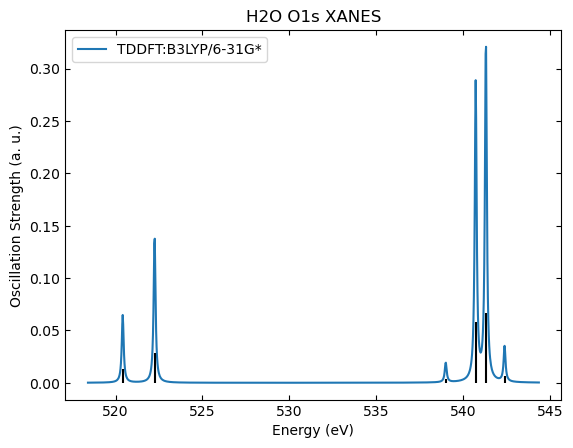

In [6]:
# import plot code
from importlib import reload # reload function, not necessary if the module is stable
import ConvolutionPlot # the module must be imported after the reload function
                       # must import the module, not the functions in the module!!!
reload(ConvolutionPlot) # reload the updated module
from ConvolutionPlot import * # import the functions


DELETE_DATA = False

ConvPlot_XAS(gamma = 0.13, PlotTitle = "H2O O1s XANES", PlotLabel = "TDDFT:B3LYP/6-31G*")
             
if DELETE_DATA:
    os.remove(datafile)